In [18]:
import os
from mminterconcept.construction import (protein_constructor,
                           protein_constructor_vacuum,
                           protein_constructor_solvate,
                           protein_constructor_solvate_ion)

from mminterconcept.min_eq import (min_eq,
                     gro_minimize,
                     gro_eq_nvt,
                     gro_eq_npt,
                     omm_minimize,
                     omm_eq)

from mminterconcept.production import (production,
                         gromacs_production,
                         openmm_production)

from mminterconcept.analysis import (analysis,
                       mda_com,
                       mda_density,
                       mda_rdf,
                       mda_rmsd,
                       mda_rog,
                       mdtraj_com,
                       mdtraj_density,
                       mdtraj_rdf,
                       mdtraj_rmsd,
                       mdtraj_rog)

In [19]:
pdbID = '1LFH'
#mdp = os.path.join(os.path.realpath(__file__), "data", "em.mdp")
mdp = os.path.join(os.getcwd(), os.path.join("mminterconcept", "data", "em.mdp"))

In [20]:
trajectory, topology = protein_constructor_vacuum(pdbID, mdp)

In [25]:
trajectory, topology = omm_minimize(trajectory=trajectory, topology=topology)

In [6]:
trajectory, topology = omm_eq(trajectory=trajectory, topology=topology)

In [7]:
trajectory = openmm_production(trajectory=trajectory, topology=topology)

In [27]:
com = mda_com(trajectory)
#print(com)
density = mda_density(trajectory)
#print(density)
rdf_bins, rdf_rdf = mda_rdf(trajectory)
#print(rdf_r)
#print(rdf_p)
rmsd = mda_rmsd(trajectory)
print(rmsd)
rog = mda_rog(trajectory)
#print(rog)

0.0


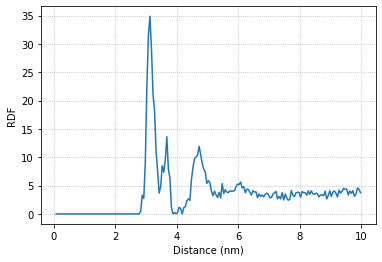

In [26]:
import matplotlib.pylab as plt
plt.plot(rdf_bins[1:], rdf_rdf[1:])
plt.xlabel('Distance (nm)')
plt.ylabel('RDF')
plt.grid(linestyle=':')
plt.show()
